In [2]:
# Import packages
import os
import glob
import rasterio

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [3]:
# Define filepath
filepath = 'C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + '*.tif'))
print(files)

['C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data\\17b5.tif', 'C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data\\17b7.tif', 'C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data\\1b5.tif', 'C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data\\1b7.tif']


In [4]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [5]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

In [10]:
# Compute NBR 
np.seterr(divide='ignore', invalid='ignore')
nbr = np.divide((list_bands[2].astype(float) - list_bands[0].astype(float)), \
                (list_bands[2].astype(float) + list_bands[0].astype(float)))


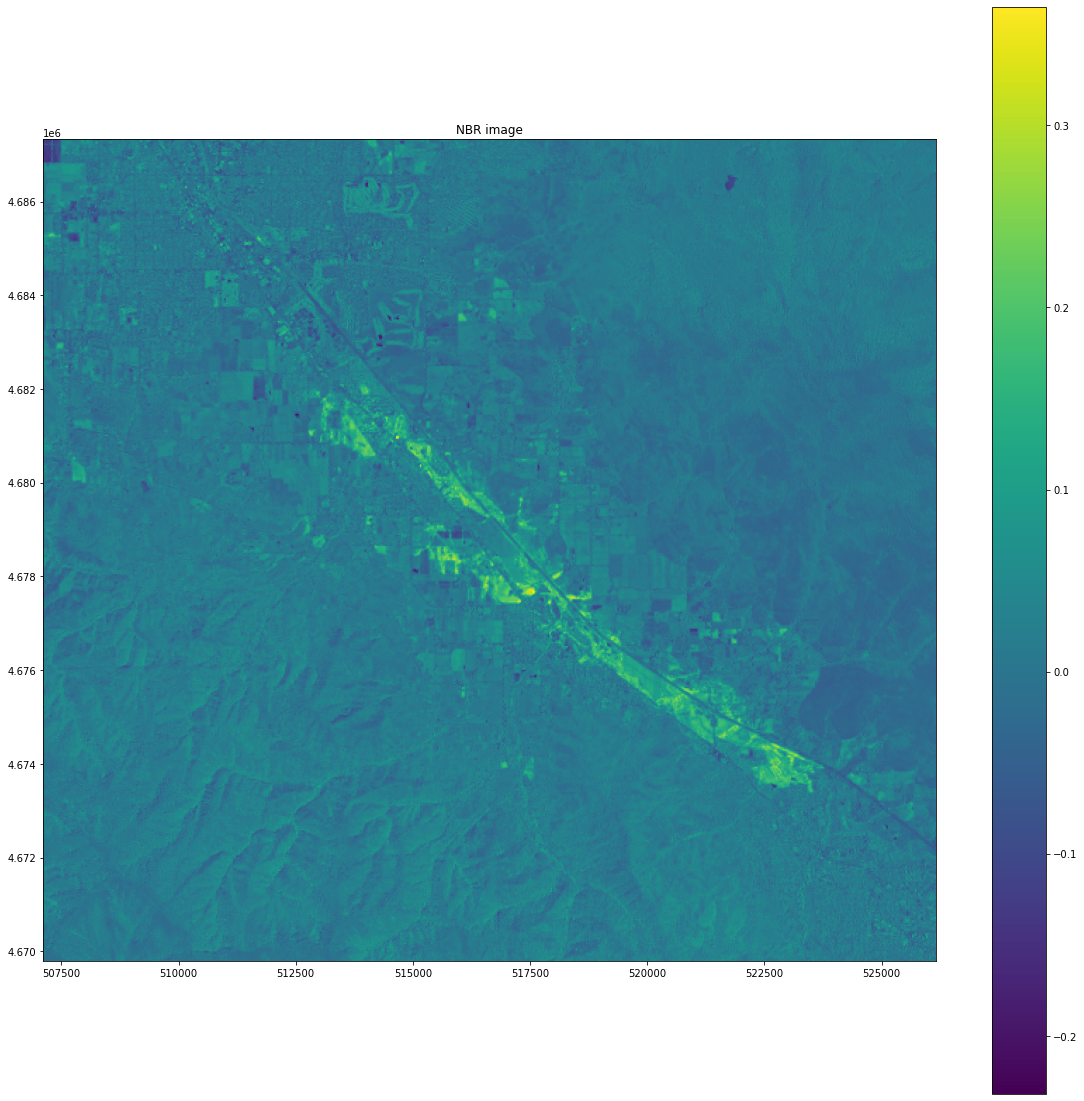

In [11]:
# Plot NBR image
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(nbr, extent=full_extent)
ax.set_title("NBR image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [42]:
# Clip NBR results
nbrClipped = nbr > 0.1

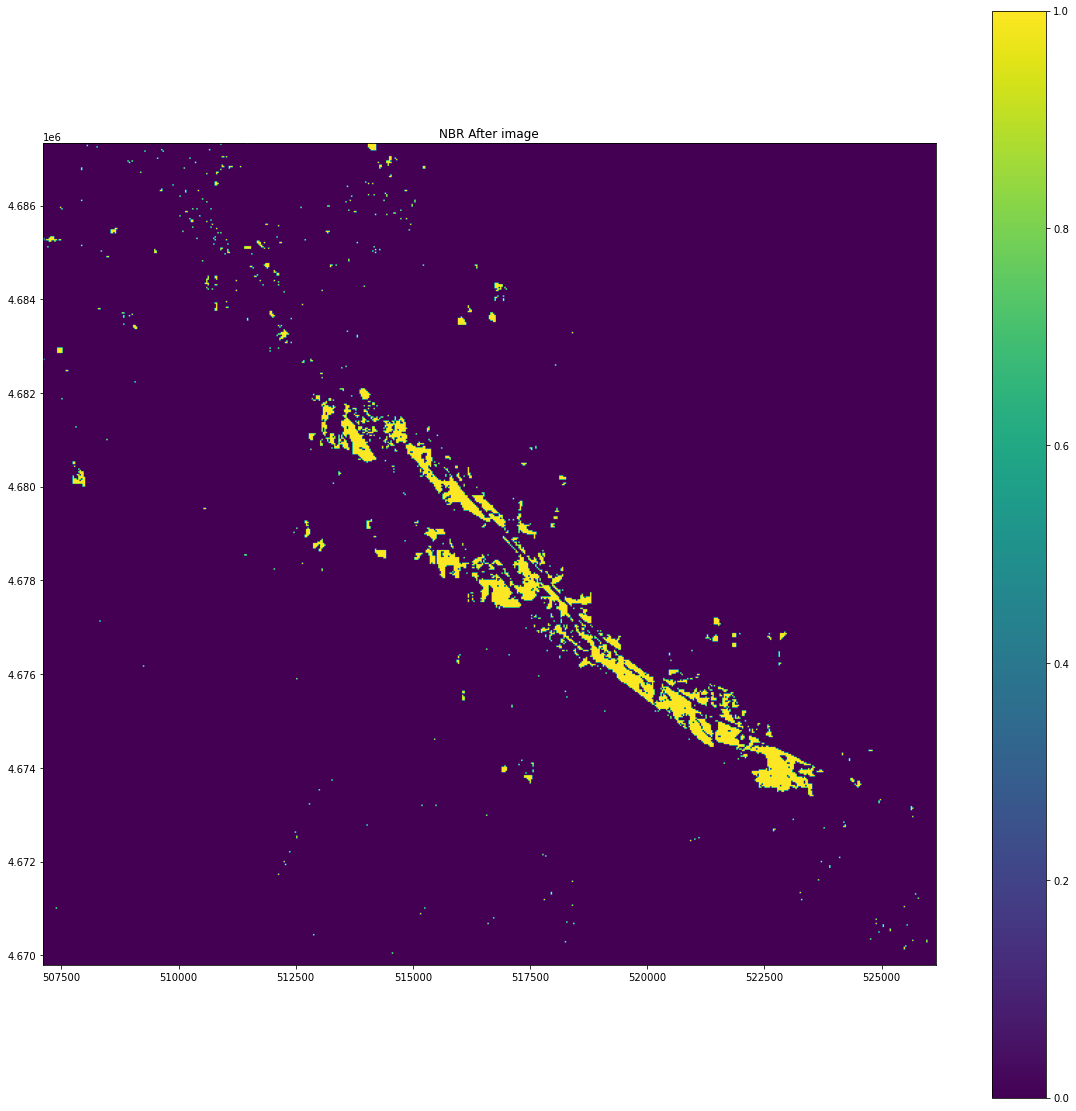

In [43]:
# Plot NBR clipped image
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(nbrClipped, extent=full_extent)
ax.set_title("NBR After image")
fig.colorbar(im, orientation='vertical')
plt.show()